In [1]:
import numpy as np
import mdtraj as md
import sys
import scipy.spatial.distance as sd

%load_ext autoreload

In [2]:
sys.path.append("../src")
import mdutils

## Load one frame

In [3]:
frames=[0]

In [4]:
xtc="/media/gmancini/09e994f6-73c1-425f-b9e7-19fb6b78e81d/perDaniele/dpap_acn/dpap_nofit_50ps.xtc"

In [5]:
traj = md.load_xtc(xtc,top="dpap.pdb")

In [6]:
t1 = md.load(xtc,top="dpap.pdb")

## USR with python

In [7]:
mdutils.USR(t1.xyz[0]*10)

array([ 3.52338505,  1.9072113 , -0.04419642,  3.52069759,  2.02775598,
       -0.02953482,  7.0710125 ,  8.00575256, -0.71939838,  6.10679531,
        7.28107214, -0.35685107])

 ## with C -- gsl
USR 0 3.522218 USR 1 1.906352 USR 2 -0.042134  
USR 3 3.519562 USR 4 2.027721 USR 5 -0.027561  
USR 6 7.068914 USR 7 7.996982 USR 8 -0.690029  
USR 9 7.068914 USR 10 7.996982 USR 11 -0.690029  

## with swig

In [8]:
import pyusr
%autoreload 2

In [9]:
t1.xyz[0].shape

(36, 3)

In [10]:
usr = np.zeros(12)
weights = np.ones(traj.n_atoms)
pyusr.pyUSR(t1.xyz[0]*10,weights,usr)
usr

array([ 3.52338514,  1.96170341, -0.0441967 ,  3.52069773,  2.08569178,
       -0.02953503,  7.07101232,  8.23448879, -0.71939817,  6.10679558,
        7.48910217, -0.35685139])

In [11]:
usr0 = np.zeros(12)
weights = np.ones(traj.n_atoms)
pyusr.pyUSR(traj.xyz[0]*10,weights,usr0)
usr0

array([ 3.52338514,  1.96170341, -0.0441967 ,  3.52069773,  2.08569178,
       -0.02953503,  7.07101232,  8.23448879, -0.71939817,  6.10679558,
        7.48910217, -0.35685139])

In [12]:
usr1 = np.zeros(12)
pyusr.pyUSR(traj.xyz[1]*10,weights,usr1)
usr1

array([ 3.52978029,  1.96852396, -0.07015161,  3.52844645,  2.08421963,
       -0.04594247,  6.97973474,  8.18035835, -0.63081109,  6.10103075,
        7.21549851, -0.47214786])

In [13]:
usr2 = np.zeros(12)
pyusr.pyUSR(traj.xyz[2]*10,weights,usr2)
usr2

array([ 3.53867139,  2.00874972, -0.06398454,  3.53401192,  2.10396581,
       -0.04470314,  7.06448578,  8.23529527, -0.69706468,  6.13282231,
        7.13771997, -0.50579397])

In [14]:
print(sd.cityblock(usr0,usr1))
print(sd.cityblock(usr0,usr2))
print(sd.cityblock(usr1,usr2))

0.693458963376
0.684894748751
0.430992694828


In [15]:
traj.xyz[:3].shape

(3, 36, 3)

In [17]:
USR = np.zeros((3,3))
pyusr.pyUSRmat(traj.xyz[:3]*10,USR,weights,1)

In [18]:
USR

array([[ 0.        ,  0.69345896,  0.68489475],
       [ 0.        ,  0.        ,  0.43099269],
       [ 0.        ,  0.        ,  0.        ]])

In [19]:
traj.xyz.shape

(10001, 36, 3)

In [20]:
USR = np.zeros((10001,10001))
pyusr.pyUSRmat(traj.xyz,USR,weights,8)

In [21]:
USR = USR[np.triu_indices(10000)]
USR.shape

(50005000,)

In [22]:
import matplotlib.pyplot as plt

In [23]:
n,b,p = plt.hist(USR,bins=50)

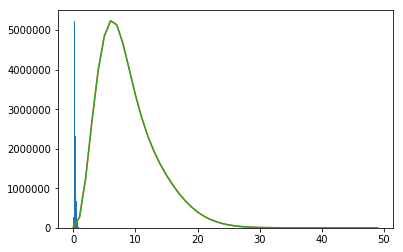

In [25]:
plt.plot(n)
plt.show()